In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt


In [10]:
df = pd.read_csv("/Users/donjhaiholland/Downloads/U.S._Chronic_Disease_Indicators.csv")
df.head()
#df.dtypes
#df.describe()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,TopicID,QuestionID,ResponseID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2020,2020,US,United States,BRFSS,Health Status,Recent activity limitation among adults,NaN,Number,Age-adjusted Mean,...,HEA,HEA04,NaN,AGEADJMEAN,SEX,SEXF,NaN,NaN,NaN,NaN
1,2015,2019,AR,Arkansas,US Cancer DVT,Cancer,"Invasive cancer (all sites combined), incidence",NaN,Number,Number,...,CAN,CAN07,NaN,NMBR,SEX,SEXM,NaN,NaN,NaN,NaN
2,2015,2019,CA,California,US Cancer DVT,Cancer,"Cervical cancer mortality among all females, u...",NaN,Number,Number,...,CAN,CAN03,NaN,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
3,2015,2019,CO,Colorado,US Cancer DVT,Cancer,"Invasive cancer (all sites combined), incidence",NaN,Number,Number,...,CAN,CAN07,NaN,NMBR,RACE,HIS,NaN,NaN,NaN,NaN
4,2015,2019,GA,Georgia,US Cancer DVT,Cancer,"Prostate cancer mortality among all males, und...",NaN,Number,Number,...,CAN,CAN05,NaN,NMBR,RACE,WHT,NaN,NaN,NaN,NaN


In [ ]:
# Drop empty columns
nan_cols = df.columns[df.isna().all()]
nonan_cols = df.drop(columns=nan_cols)
nonan_cols.head()

In [3]:
# Parse Geolocation Points
#nonan_cols["Geolocation"].astype(str)

#lon_lat = (nonan_cols["Geolocation"]
        #    .str.replace("POINT (", "", regex=False) # set false to make it literal
        #    .str.replace(")", "", regex=False)
        #    .str.split(r"\s+", expand=True)) # makes 2 columns

#nonan_cols["lon"] = pd.to_numeric(lon_lat[0], errors="coerce")
#nonan_cols["lat"] = pd.to_numeric(lon_lat[1], errors="coerce")
#nonan_cols


In [4]:
# Build diabetes table
diabetes = nonan_cols.loc[
    (nonan_cols["Topic"]=="Diabetes") & (nonan_cols["StratificationCategory1"]=="Overall") & 
    (nonan_cols["DataValueType"]=="Age-adjusted Prevalence")
]

# Select relevant columns
diab_y = diabetes[["LocationAbbr", "LocationDesc" ,"YearStart", "YearEnd",
    "DataValue", "LowConfidenceLimit", "HighConfidenceLimit",
    "Question", "QuestionID"
]].rename(columns={"DataValue":"diabetes_y", 
                   "LowConfidenceLimit":"diabetes_lcl",
                   "HighConfidenceLimit":"diabetes_ucl",
                   "Question":"diabetes_question",    
                   "QuestionID": "diabetes_question_id"})

# Ensure numeric
diab_y["diabetes_y"] = pd.to_numeric(diab_y["diabetes_y"], errors="coerce")

In [5]:
# Build poverty table
poverty = nonan_cols.loc[(nonan_cols['Topic']=="Social Determinants of Health") &
(nonan_cols["StratificationCategory1"]=="Overall") & (nonan_cols["QuestionID"]=="SDH01")]


pov_x = poverty[[
    "LocationAbbr","LocationDesc", "YearStart", "YearEnd",
    "DataValue", "LowConfidenceLimit", "HighConfidenceLimit",
    "Question", "QuestionID"
]].rename(columns={"DataValue":"poverty_x", "LowConfidenceLimit":"poverty_lcl",
                   "HighConfidenceLimit":"poverty_ucl", "Question":"poverty_question",
                    "QuestionID":"poverty_question_id" })
pov_x

,LocationAbbr,LocationDesc,YearStart,YearEnd,poverty_x,poverty_lcl,poverty_ucl,poverty_question,poverty_question_id
15515,AR,Arkansas,2019,2019,27.8,26.8,28.9,Living below 150% of the poverty threshold amo...,SDH01
18668,AK,Alaska,2019,2019,17.7,15.8,19.9,Living below 150% of the poverty threshold amo...,SDH01
21571,AZ,Arizona,2019,2019,21.9,21.4,22.6,Living below 150% of the poverty threshold amo...,SDH01
26877,AL,Alabama,2019,2019,25.4,24.6,26.2,Living below 150% of the poverty threshold amo...,SDH01
32066,HI,Hawaii,2019,2019,14.6,13.3,16.0,Living below 150% of the poverty threshold amo...,SDH01
...,...,...,...,...,...,...,...,...,...
258688,TN,Tennessee,2021,2021,23.0,22.4,23.7,Living below 150% of the poverty threshold amo...,SDH01
259422,VT,Vermont,2021,2021,16.5,14.6,18.6,Living below 150% of the poverty threshold amo...,SDH01
263677,WI,Wisconsin,2021,2021,17.8,17.1,18.5,Living below 150% of the poverty threshold amo...,SDH01
267548,WY,Wyoming,2021,2021,19.2,17.3,21.3,Living below 150% of the poverty threshold amo...,SDH01


States: 52
(102, 14)


<Axes: xlabel='Diabetes Age-Adjusted Prevelance', ylabel='Poverty Crude Prevelance'>

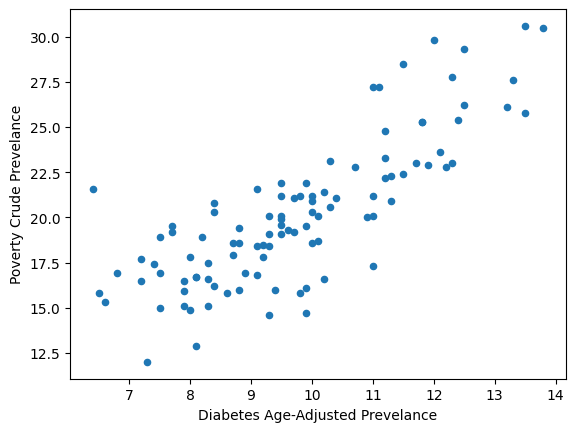

In [6]:
# Merge the two tables
analysis = pd.merge(diab_y, pov_x, on=["LocationAbbr", "LocationDesc", "YearStart", "YearEnd"], how='inner')

print("States:", analysis["LocationAbbr"].nunique())
analysis = analysis.dropna(subset=["diabetes_y", "poverty_x"]).reset_index(drop=True)

print(analysis.shape)
analysis.plot.scatter(x='diabetes_y', y='poverty_x', xlabel='Diabetes Age-Adjusted Prevelance', ylabel='Poverty Crude Prevelance')

In [ ]:
# Create Maps for initial comparison

# 2019 Maps
import plotly.express as px

map_2019 = analysis[
    (analysis["YearStart"] == 2019) & (analysis["YearEnd"] == 2019)
][["LocationAbbr", "diabetes_y", "poverty_x", "LocationDesc"]]

fig = px.choropleth(
    map_2019,
    locations="LocationAbbr",
    locationmode="USA-states",
    color="diabetes_y",
    scope="usa",
    hover_name="LocationDesc",
    title="Figure 1: Age-adjusted Diabetes Prevalence by State (2019)"
)


fig.update_layout(
    coloraxis_colorbar=dict(
        title="Diabetes prevalence (%)"
    )
)

fig.show(renderer="browser")

fig = px.choropleth(
    map_2019,
    locations="LocationAbbr",
    locationmode="USA-states",
    color="poverty_x",
    scope="usa",
    hover_name="LocationDesc",
    title="Figure 2: Poverty (<150% Threshold) Prevelance by State (2019)"
)


fig.update_layout(
    coloraxis_colorbar=dict(
        title="Poverty prevalence (%)"
    )
)

fig.show(renderer="browser")

In [ ]:
# 2021 Maps 
map_2021 = analysis[
    (analysis["YearStart"] == 2021) & (analysis["YearEnd"] == 2021)
][["LocationAbbr", "diabetes_y", "poverty_x", "LocationDesc"]]

fig = px.choropleth(
    map_2021,
    locations="LocationAbbr",
    locationmode="USA-states",
    color="diabetes_y",
    scope="usa",
    hover_name="LocationDesc",
    title="Figure 3: Age-adjusted Diabetes Prevalence by State (2021)"
)


fig.update_layout(
    coloraxis_colorbar=dict(
        title="Diabetes prevalence (%)"
    )
)

fig.show(renderer="browser")

fig = px.choropleth(
    map_2021,
    locations="LocationAbbr",
    locationmode="USA-states",
    color="poverty_x",
    scope="usa",
    hover_name="LocationDesc",
    title="Figure 4: Poverty (<150% Threshold) Prevelance by State (2021)"
)


fig.update_layout(
    coloraxis_colorbar=dict(
        title="Poverty prevalence (%)"
    )
)

fig.show(renderer="browser")

In [12]:
# Export table for reuse
analysis.to_csv('analysis_p1.csv', index=False)

In [13]:
analysis.to_parquet('analysis_p1.parquet', index=False)

In [ ]:
map_2019

In [ ]:
map_2019.plot.scatter(x='diabetes_y', y='poverty_x', xlabel='Diabetes Age-Adjusted Prevelance', ylabel='Poverty Crude Prevelance')
map_2021.plot.scatter(x='diabetes_y', y='poverty_x', xlabel='Diabetes Age-Adjusted Prevelance', ylabel='Poverty Crude Prevelance')